In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from sklearn import tree
from sklearn.metrics import mean_squared_error
print("Pandas version used: " + pd.__version__)
print("Matplotlib version used: " + plt.matplotlib.__version__)
print("Numpy version used: " + np.__version__)
print("Seaborn version used: " + sns.__version__)
print("Statsmodels version used: " + sm.__version__)
print("Scikit-learn version used: " + sklearn.__version__)

Pandas version used: 1.0.5
Matplotlib version used: 3.2.2
Numpy version used: 1.18.5
Seaborn version used: 0.10.1
Statsmodels version used: 0.11.1
Scikit-learn version used: 0.23.1


<h3>In this notebook I will begin using decision trees to see if the scores for the various tests and the average score for all tests can be predicted by the various features given concerning each student.
    
<br>There is a training dataset of 10,000 rows and a test dataset of 10,000 rows, so no need to do a train_test_split. The test dataset has not been used for analysis or modeling before now.

In [2]:
# Read in the training dataset:
stu_perf_df = pd.read_csv("Datasets/stu_perf_clean.csv",index_col='stu_id')

# Read in the testing dataset:
test_data_df = pd.read_csv("Datasets/test_data_clean.csv",index_col='stu_id')

In [3]:
# Make sure the dataset looks good still:
stu_perf_df.head()

,female,eth_A,eth_B,eth_C,eth_D,p_ed_hs,p_ed_som_col,p_ed_assc,p_ed_bach,p_ed_mast,std_lunch,test_prep,math_score,reading_score,writing_score,avg_score
stu_id,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,1,0,71,59,54,61.33
1,1,0,1,0,0,0,0,0,0,0,0,0,40,51,49,46.67
2,0,0,1,0,0,0,0,1,0,0,1,0,87,73,75,78.33
3,0,0,0,1,0,0,0,0,0,0,1,0,69,53,55,59.00
4,1,0,0,1,0,1,0,0,0,0,1,0,74,79,72,75.00


In [4]:
# Make sure there are no issues with the test dataset, either:
test_data_df.head()

,female,eth_A,eth_B,eth_C,eth_D,p_ed_hs,p_ed_som_col,p_ed_assc,p_ed_bach,p_ed_mast,std_lunch,test_prep,math_score,reading_score,writing_score,avg_score
stu_id,,,,,,,,,,,,,,,,
0,0,0,0,0,1,0,0,1,0,0,0,0,68,63,60,63.67
1,1,0,0,1,0,0,0,0,1,0,1,1,54,65,62,60.33
2,0,0,0,1,0,0,0,1,0,0,0,0,58,53,52,54.33
3,1,0,1,0,0,0,1,0,0,0,0,1,67,95,91,84.33
4,0,0,0,0,0,0,1,0,0,0,1,0,95,83,80,86.00


<h3>Next I will set all of the training/testing variables for the average_score predicting models:

In [5]:
# Set all of the variables for training the models:

# Put all of our features into a variable for training:
train_cols = stu_perf_df.columns[:-4]
X_train = (stu_perf_df[train_cols])

# Create y training variable for average score:
y_avg_train  = stu_perf_df.avg_score

In [6]:
# Set all of the variables for testing the models:

# Put all of our features into a variable for testing:
test_cols = test_data_df.columns[:-4]
X_test = (test_data_df[test_cols])

# Create y testing variable for average score:
y_avg_test  = test_data_df.avg_score

<h3>First, I want to try to apply a least squares approach to predicting the average score:

In [7]:
# Add a constant to the training set for linear regression:
X_lin_train = sm.add_constant(X_train)

# Create the model:
lin_avg_mod = sm.OLS(y_avg_train, X_lin_train, hasconst=True)

# Fit the model:
lin_avg_res = lin_avg_mod.fit()

# Get a summary of all of the critical details about the model:
print(lin_avg_res.summary())

# Including the total MSE and RMSE so we can compare it to the classification trees later:
mse = lin_avg_res.mse_total
rmse = np.sqrt(lin_avg_res.mse_total)
print('\nMSE: ' + str(mse))
print('\nRMSE: ' + str(rmse))

                            OLS Regression Results                            
Dep. Variable:              avg_score   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     321.2
Date:                Tue, 13 Oct 2020   Prob (F-statistic):               0.00
Time:                        01:45:29   Log-Likelihood:                -39229.
No. Observations:               10000   AIC:                         7.848e+04
Df Residuals:                    9987   BIC:                         7.858e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           59.2199      0.475    124.586   

<h3>According to the summary, this model is not great for predicting the average test scores for the students. The R-squared, at around 27-28%, means the average score is not explained well by the independent variables. While all of the variables are important (indicated by their low p-values), they do not seem to be major predictors of the test results.

<h3>Though not a great model, we can see that the student's parents having a bachelor or master degree has greater weight than some of the other options. So is having the standard lunch, which again suggests some sort of socioeconomic element to improved test performance.

<h3>The RMSE, at around ~14.3, is not great either, but we've already established that this is not an ideal model for this type of data or that these features are not very good predictors in general.

<h3>Finally we could plot the residuals to demonstrate the variance present in the model:

Text(0.5, 1.0, 'OLS Residuals vs. Predicted Test Scores')

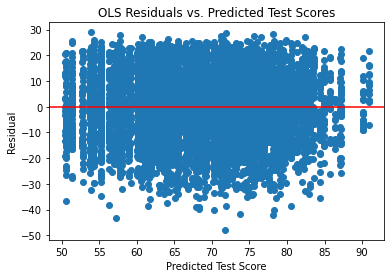

In [8]:
# Prep the test variable:
X_lin_avg_test = sm.add_constant(X_test)

test_pred = lin_avg_res.predict(X_lin_avg_test)
residuals = lin_avg_res.resid

# Create a scatter plot of the residuals vs. the test predictions:
plt.scatter(test_pred, residuals)
plt.xlabel('Predicted Test Score')
plt.ylabel('Residual')
plt.axhline(y=0, c='r')
plt.title("OLS Residuals vs. Predicted Test Scores")

<h3>Next, I will look at how well a decision tree can predict the average score based off of the categorical features for each student:

In [9]:
# Prepare the model. After several iterations, 100 seems to be a good min_samples_split and seems to produce
# the best results (hopefully without overfitting):
estimator = tree.DecisionTreeRegressor(min_samples_split=100)
# Fit the model:
estimator.fit(X_train,y_avg_train)

DecisionTreeRegressor(min_samples_split=100)

In [10]:
# Print out the R^2 for the decision tree:
est_r_sq = estimator.score(X_test, y_avg_test)
print('R^2: ' + str(est_r_sq))

R^2: 0.24266448825981823


<h3>The R^2 for the decision tree seems to be slightly worse than the linear model. 0.24 vs. 0.27. This reinforces the idea that these features are not good explanatory variables for the data.

In [11]:
# Display the total MSE and RMSE for the test data so we can compare it to the linear model:
tree_avg_pred = estimator.predict(X_test)

tree_mse = mean_squared_error(y_avg_test, tree_avg_pred)
tree_rmse = np.sqrt(tree_mse)

print('MSE: ' + str(tree_mse))
print('\nRMSE: ' + str(tree_rmse))

MSE: 152.60579720880497

RMSE: 12.353371896320654


<h3>The RMSE seems to show a slight improvement over the linear model (12 vs. 14), however.

Text(0.5, 1.0, 'Actual Values vs. Predicted Test Scores via Decision Tree')

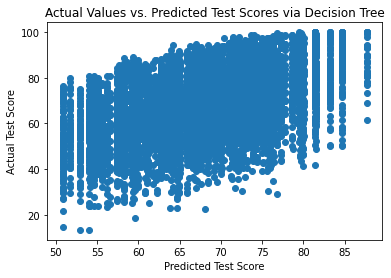

In [12]:
# Create a scatter plot of the residuals vs. the test predictions:
plt.scatter(tree_avg_pred, y_avg_test)
plt.xlabel('Predicted Test Score')
plt.ylabel('Actual Test Score')
plt.title("Actual Values vs. Predicted Test Scores via Decision Tree")

<h3>While the model seems to get some of the results right (at least there is a mild linear correlation), the model is unable to predict any values lower than 50 and otherwise displays a wide array of variance.

<h3>In conclusion, while these features bear some impact on the average score that students achieve, they are definitely not the most important features or these are not good models to use with this data. In order to produce a better predictor, additional features should be collected such as previous grades, number of absences, time spend studying, etc. and additional models should be tested.